In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('GlobalWeatherRepository.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49111 entries, 0 to 49110
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       49111 non-null  object 
 1   location_name                 49111 non-null  object 
 2   latitude                      49111 non-null  float64
 3   longitude                     49111 non-null  float64
 4   timezone                      49111 non-null  object 
 5   last_updated_epoch            49111 non-null  int64  
 6   last_updated                  49111 non-null  object 
 7   temperature_celsius           49111 non-null  float64
 8   temperature_fahrenheit        49111 non-null  float64
 9   condition_text                49111 non-null  object 
 10  wind_mph                      49111 non-null  float64
 11  wind_kph                      49111 non-null  float64
 12  wind_degree                   49111 non-null  int64  
 13  w

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('GlobalWeatherRepository.csv')

def preprocess_data(df):
    """
    Comprehensive data preprocessing function
    
    Steps:
    1. Check for missing values
    2. Handle outliers
    3. Convert datetime features
    4. Normalize numerical features
    """
    # 1. Missing Value Check
    print("Missing Values:")
    print(df.isnull().sum())
    
    # 2. Outlier Detection and Handling
    def detect_outliers(column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Numerical columns to check for outliers
    numerical_columns = [
        'temperature_celsius', 'wind_mph', 'pressure_mb', 
        'precip_mm', 'humidity', 'air_quality_PM2.5'
    ]
    
    for col in numerical_columns:
        outliers = detect_outliers(col)
        print(f"\nOutliers in {col}: {len(outliers)}")
    
    # 3. Datetime Conversion
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    df['year'] = df['last_updated'].dt.year
    df['month'] = df['last_updated'].dt.month
    df['day'] = df['last_updated'].dt.day
    
    # 4. Normalize Numerical Features
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df

# Preprocess the data
processed_df = preprocess_data(df)

Missing Values:
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               

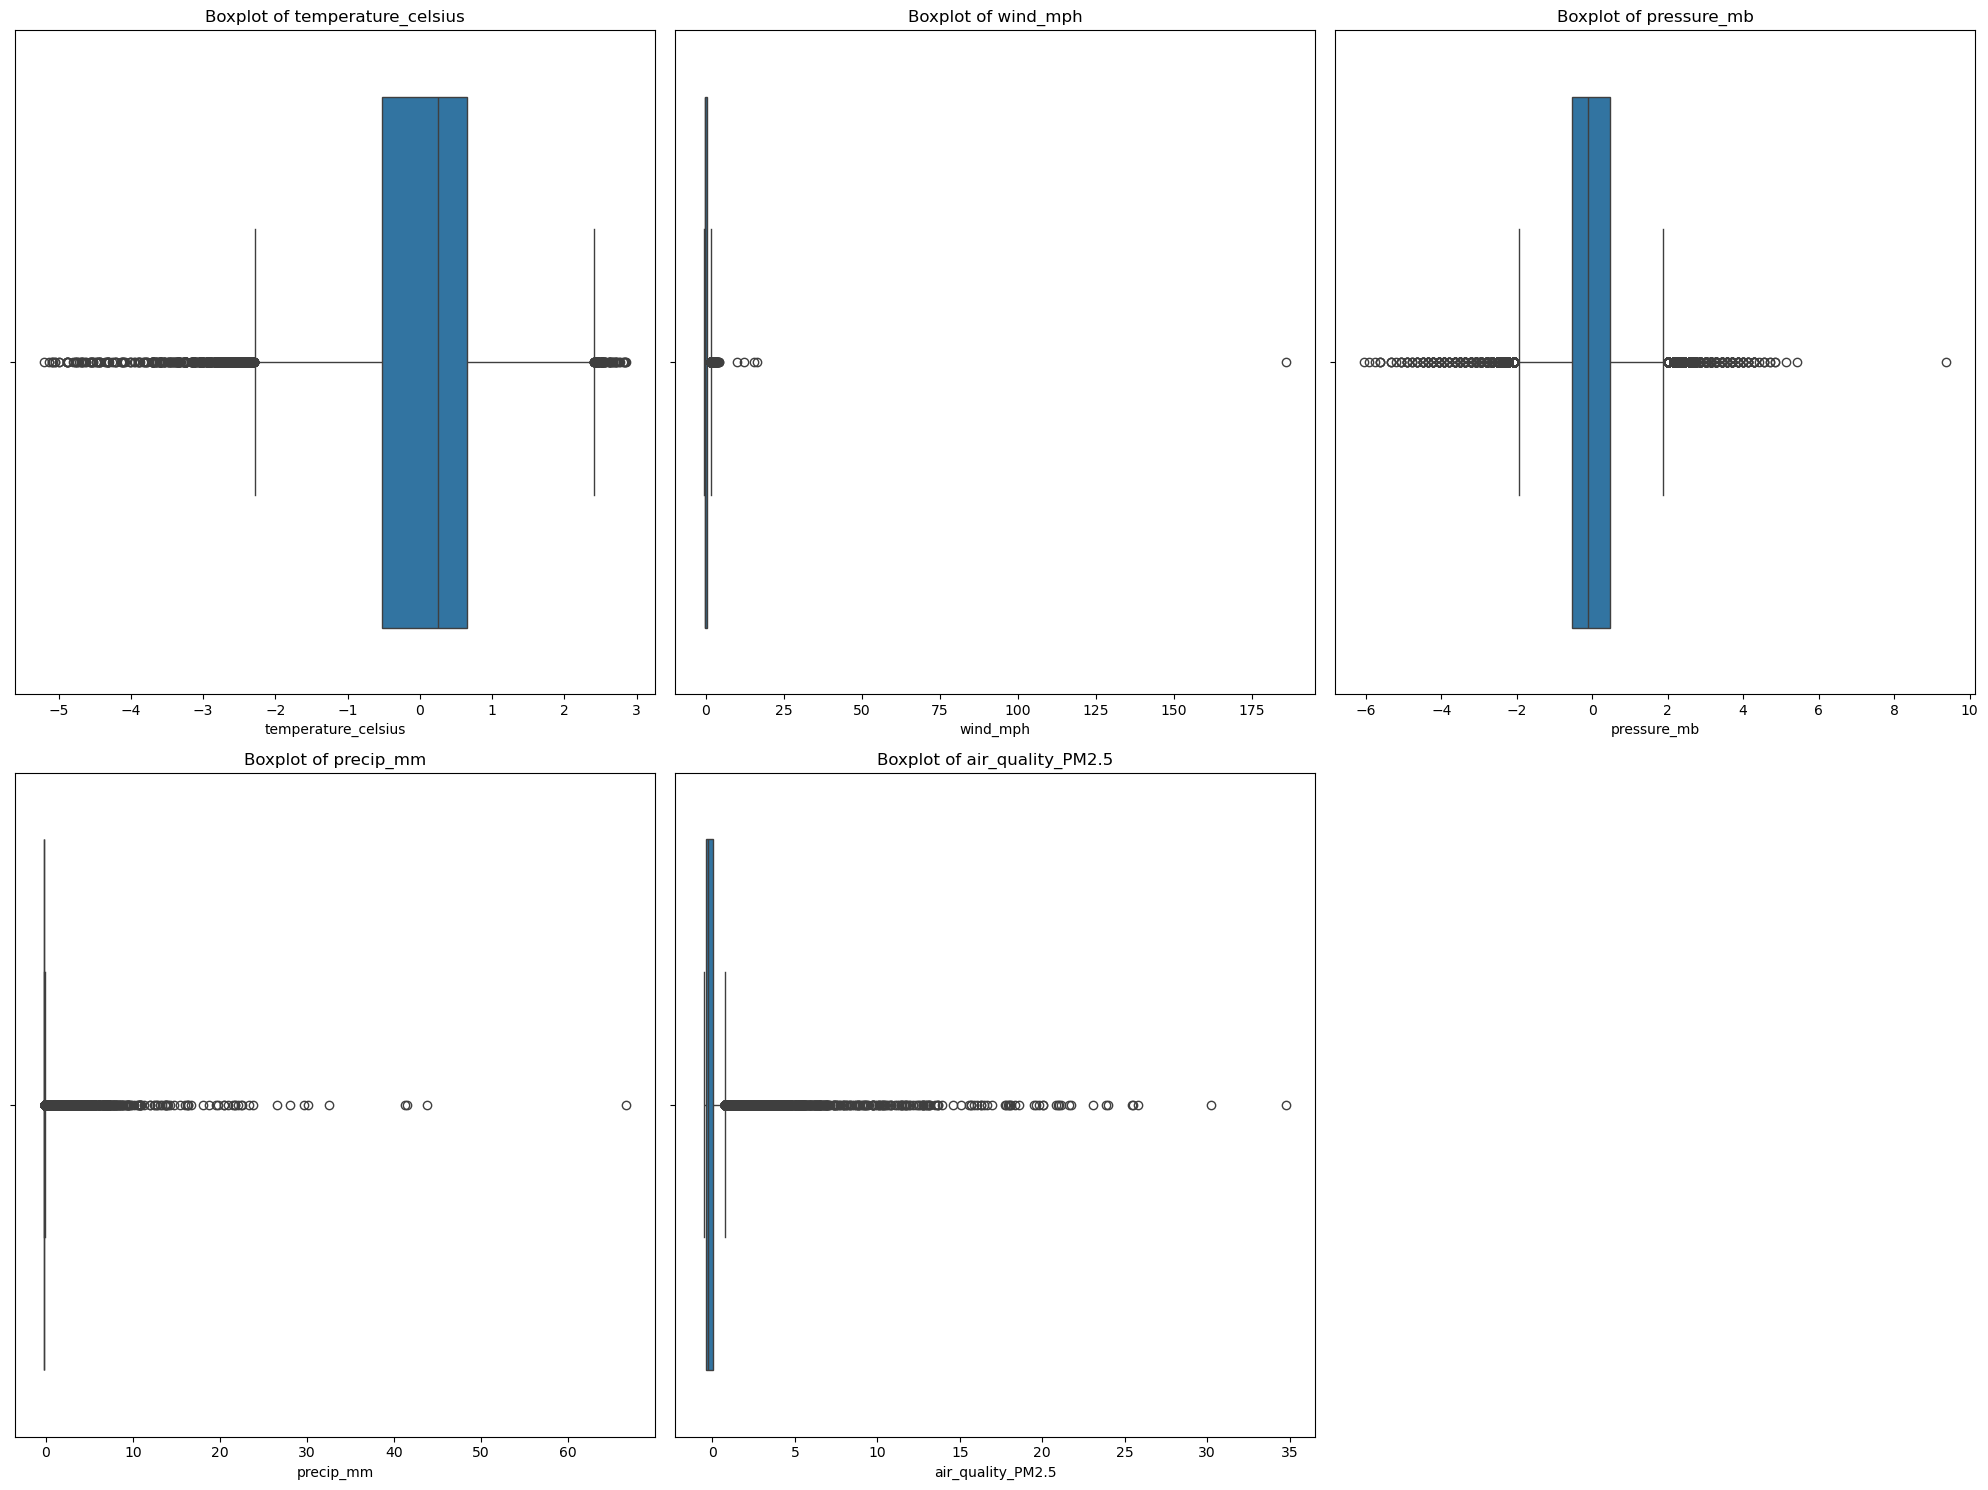

Outlier Analysis Summary:

temperature_celsius:
  total_outliers: 258
  outlier_percentage: 0.5253405550691291
  min_outlier: -5.202724292949661
  max_outlier: -3.004202516580269

wind_mph:
  total_outliers: 21
  outlier_percentage: 0.04276027773818493
  min_outlier: 3.0657681560864325
  max_outlier: 185.97078308202475

pressure_mb:
  total_outliers: 520
  outlier_percentage: 1.0588259249455314
  min_outlier: -6.051651792962884
  max_outlier: 9.37691107164945

precip_mm:
  total_outliers: 593
  outlier_percentage: 1.2074687951782697
  min_outlier: 3.0145456917984648
  max_outlier: 66.63079276859902

air_quality_PM2.5:
  total_outliers: 608
  outlier_percentage: 1.2380118507055444
  min_outlier: 3.0097993667571306
  max_outlier: 34.769840917188745


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def advanced_outlier_detection(df):
    """
    Advanced outlier detection and analysis
    """
    # Numerical columns for outlier analysis
    numerical_columns = [
        'temperature_celsius', 'wind_mph', 'pressure_mb', 
        'precip_mm', 'air_quality_PM2.5'
    ]
    
    outlier_summary = {}
    
    plt.figure(figsize=(20, 15))
    
    for i, col in enumerate(numerical_columns, 1):
        # Z-score method for outlier detection
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = df[z_scores > 3]
        
        outlier_summary[col] = {
            'total_outliers': len(outliers),
            'outlier_percentage': (len(outliers) / len(df)) * 100,
            'min_outlier': outliers[col].min(),
            'max_outlier': outliers[col].max()
        }
        
        # Boxplot for visualization
        plt.subplot(2, 3, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    return outlier_summary

def handle_outliers(df, method='winsorization'):
    """
    Handle outliers using different methods
    """
    numerical_columns = [
        'temperature_celsius', 'wind_mph', 'pressure_mb', 
        'precip_mm', 'air_quality_PM2.5'
    ]
    
    if method == 'winsorization':
        for col in numerical_columns:
            lower_bound = df[col].quantile(0.05)
            upper_bound = df[col].quantile(0.95)
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Perform outlier analysis
outlier_results = advanced_outlier_detection(df)
print("Outlier Analysis Summary:")
for col, stats in outlier_results.items():
    print(f"\n{col}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")

# Handle outliers
df_cleaned = handle_outliers(df)

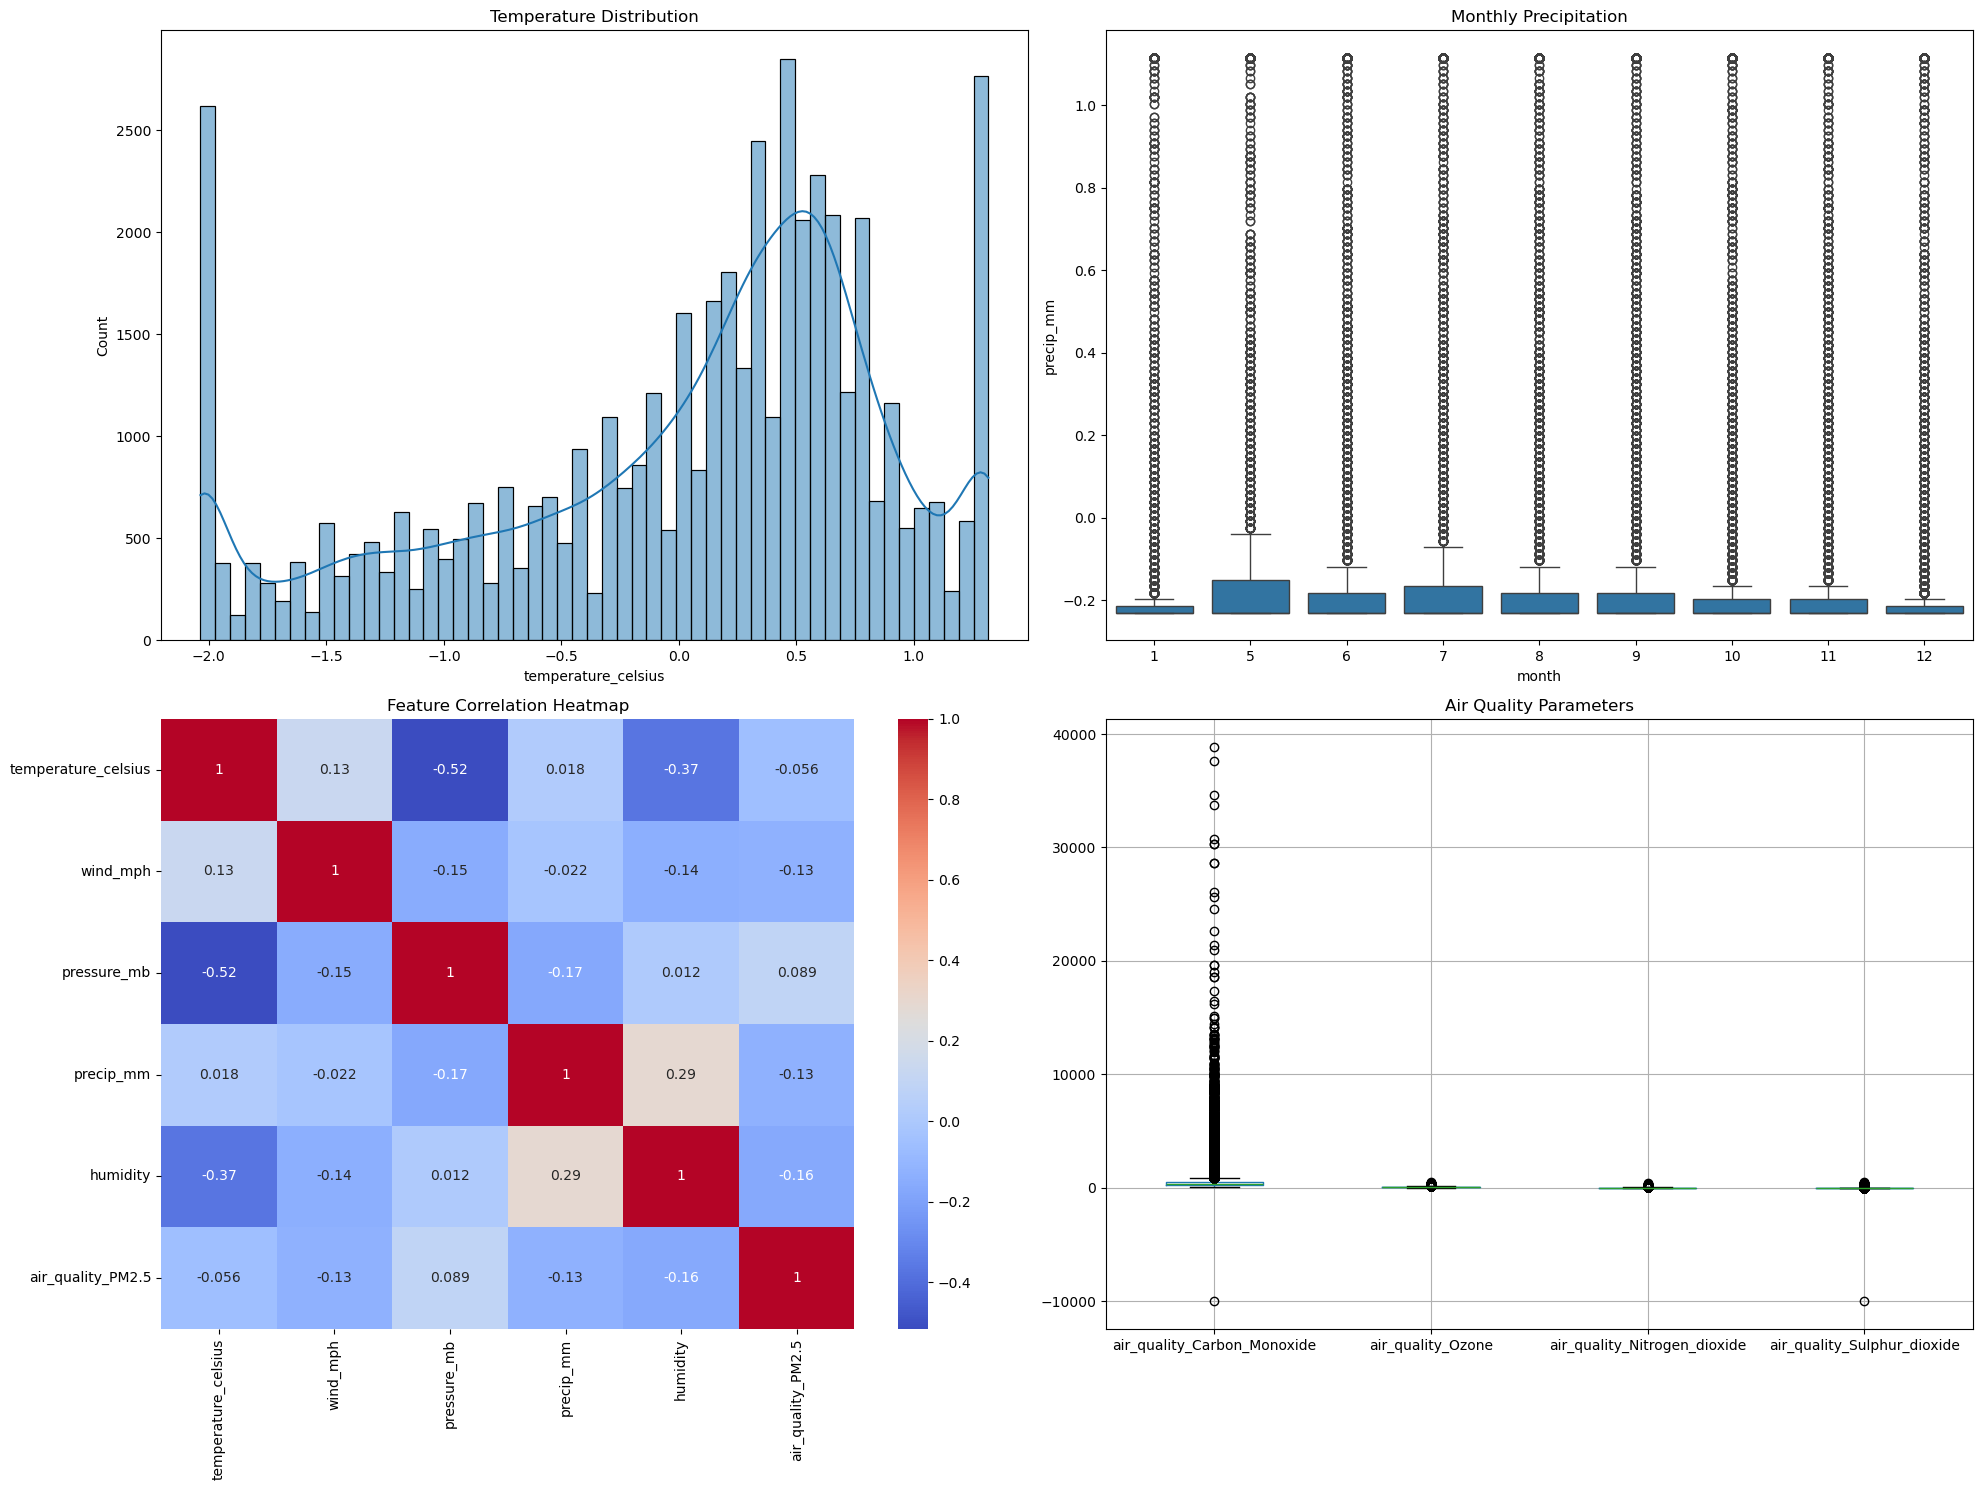

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df):
    """
    Comprehensive Exploratory Data Analysis
    
    Visualizations:
    1. Temperature Distribution
    2. Precipitation Distribution
    3. Correlation Heatmap
    4. Air Quality Analysis
    """
    plt.figure(figsize=(20, 15))
    
    # 1. Temperature Distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df['temperature_celsius'], kde=True)
    plt.title('Temperature Distribution')
    
    # 2. Precipitation Distribution
    plt.subplot(2, 2, 2)
    sns.boxplot(x='month', y='precip_mm', data=df)
    plt.title('Monthly Precipitation')
    
    # 3. Correlation Heatmap
    plt.subplot(2, 2, 3)
    correlation_columns = [
        'temperature_celsius', 'wind_mph', 'pressure_mb', 
        'precip_mm', 'humidity', 'air_quality_PM2.5'
    ]
    correlation_matrix = df[correlation_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    
    # 4. Air Quality Analysis
    plt.subplot(2, 2, 4)
    air_quality_columns = [
        'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
        'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide'
    ]
    df[air_quality_columns].boxplot()
    plt.title('Air Quality Parameters')
    plt.tight_layout()
    plt.show()

# Perform EDA
perform_eda(processed_df)

In [7]:
%pip install pmdarima

  Using cached Cython-3.0.11-py2.py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.5 MB/s eta 0:00:00:00:010:01
Using cached Cython-3.0.11-py2.py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pmdarima as pm

def prepare_time_series_data(df):
    """
    Prepare time series data with proper frequency and indexing
    """
    # Group by timestamp and aggregate
    time_series_df = df.groupby('last_updated').agg({
        'temperature_celsius': 'mean',
        'precip_mm': 'mean'
    }).reset_index()
    
    # Convert to datetime and set as index
    time_series_df['last_updated'] = pd.to_datetime(time_series_df['last_updated'])
    time_series_df.set_index('last_updated', inplace=True)
    
    # Resample to ensure regular frequency (daily)
    time_series_df = time_series_df.resample('D').mean().fillna(method='ffill')
    
    return time_series_df

def forecast_with_auto_arima(series, forecast_horizon=30):
    """
    Robust time series forecasting using auto ARIMA
    """
    # Fit auto ARIMA model with seasonality
    model = pm.auto_arima(
        series, 
        seasonal=True, 
        m=7,  # Weekly seasonality 
        suppress_warnings=True,
        stepwise=True
    )
    
    # Forecast
    forecast, conf_int = model.predict(
        n_periods=forecast_horizon, 
        return_conf_int=True
    )
    
    return forecast, conf_int

def evaluate_forecast(actual, forecast):
    """
    Comprehensive forecast evaluation
    """
    return {
        'MSE': mean_squared_error(actual, forecast),
        'MAE': mean_absolute_error(actual, forecast),
        'RMSE': np.sqrt(mean_squared_error(actual, forecast)),
        'R2': r2_score(actual, forecast)
    }

def comprehensive_forecasting(df):
    """
    Perform forecasting for temperature and precipitation
    """
    # Prepare time series data
    time_series_data = prepare_time_series_data(df)
    
    # Forecasting results dictionary
    forecast_results = {}
    
    # Temperature Forecasting
    temp_series = time_series_data['temperature_celsius']
    temp_forecast, temp_conf_int = forecast_with_auto_arima(temp_series)
    forecast_results['temperature'] = {
        'forecast': temp_forecast,
        'confidence_interval': temp_conf_int,
        'metrics': evaluate_forecast(
            temp_series[-30:], 
            temp_forecast
        )
    }
    
    # Precipitation Forecasting
    precip_series = time_series_data['precip_mm']
    precip_forecast, precip_conf_int = forecast_with_auto_arima(precip_series)
    forecast_results['precipitation'] = {
        'forecast': precip_forecast,
        'confidence_interval': precip_conf_int,
        'metrics': evaluate_forecast(
            precip_series[-30:], 
            precip_forecast
        )
    }
    
    return forecast_results

# Execute forecasting
forecast_results = comprehensive_forecasting(df)

# Print forecast metrics
for param, results in forecast_results.items():
    print(f"\n{param.capitalize()} Forecast Metrics:")
    for metric, value in results['metrics'].items():
        print(f"  {metric}: {value:.4f}")

/var/folders/pz/n2yz5zpx1mvgnsrvt24xlk4w0000gn/T/ipykernel_76696/3006849672.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_df = time_series_df.resample('D').mean().fillna(method='ffill')



Temperature Forecast Metrics:
  MSE: 0.0056
  MAE: 0.0611
  RMSE: 0.0747
  R2: -0.4752

Precipitation Forecast Metrics:
  MSE: 0.0014
  MAE: 0.0286
  RMSE: 0.0371
  R2: -0.0129


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

def anomaly_detection(df):
    """
    Advanced anomaly detection using Isolation Forest
    """
    # Select numerical features for anomaly detection
    anomaly_features = [
        'temperature_celsius', 'wind_mph', 'pressure_mb', 
        'precip_mm', 'humidity', 'air_quality_PM2.5'
    ]
    
    # Standardize features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[anomaly_features])
    
    # Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    anomaly_labels = iso_forest.fit_predict(scaled_data)
    
    # Add anomaly labels to dataframe
    df['anomaly'] = anomaly_labels
    anomalies = df[df['anomaly'] == -1]
    
    return anomalies, df

def multi_model_forecasting(df):
    """
    Ensemble forecasting with multiple models
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.model_selection import train_test_split
    
    # Prepare features
    features = [
        'latitude', 'longitude', 'temperature_celsius', 
        'wind_mph', 'pressure_mb', 'humidity'
    ]
    target = 'precip_mm'
    
    X = df[features]
    y = df[target]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Multiple models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    
    # Train and evaluate
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        results[name] = {
            'score': model.score(X_test, y_test),
            'feature_importance': model.feature_importances_ if hasattr(model, 'feature_importances_') else None
        }
    
    return results

def spatial_climate_analysis(df):
    """
    Geographical and climate pattern analysis
    """
    # Group by country and analyze climate parameters
    country_analysis = df.groupby('country').agg({
        'temperature_celsius': ['mean', 'std'],
        'precip_mm': ['mean', 'std'],
        'air_quality_PM2.5': ['mean', 'std']
    })
    
    # Correlation with geographical coordinates
    geo_correlation = df[['latitude', 'longitude', 'temperature_celsius', 'precip_mm']].corr()
    
    return country_analysis, geo_correlation

def environmental_impact_analysis(df):
    """
    Analyze correlations between air quality and weather parameters
    """
    air_quality_columns = [
        'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
        'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
        'air_quality_PM2.5', 'air_quality_PM10'
    ]
    
    weather_columns = [
        'temperature_celsius', 'wind_mph', 'humidity', 
        'pressure_mb', 'cloud'
    ]
    
    # Correlation matrix
    correlation_matrix = df[air_quality_columns + weather_columns].corr()
    
    return correlation_matrix

# Execute analyses
anomalies, processed_df = anomaly_detection(df)
forecast_results = multi_model_forecasting(df)
country_analysis, geo_correlation = spatial_climate_analysis(df)
env_impact_correlation = environmental_impact_analysis(df)

# Print key insights
print("Anomaly Detection Summary:")
print(f"Total Anomalies: {len(anomalies)}")

print("\nMulti-Model Forecasting Results:")
for model, results in forecast_results.items():
    print(f"{model}: R² Score = {results['score']:.4f}")




Anomaly Detection Summary:
Total Anomalies: 4911

Multi-Model Forecasting Results:
Linear Regression: R² Score = 0.1295
Decision Tree: R² Score = -0.3626
Random Forest: R² Score = 0.2800
Gradient Boosting: R² Score = 0.2400


/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


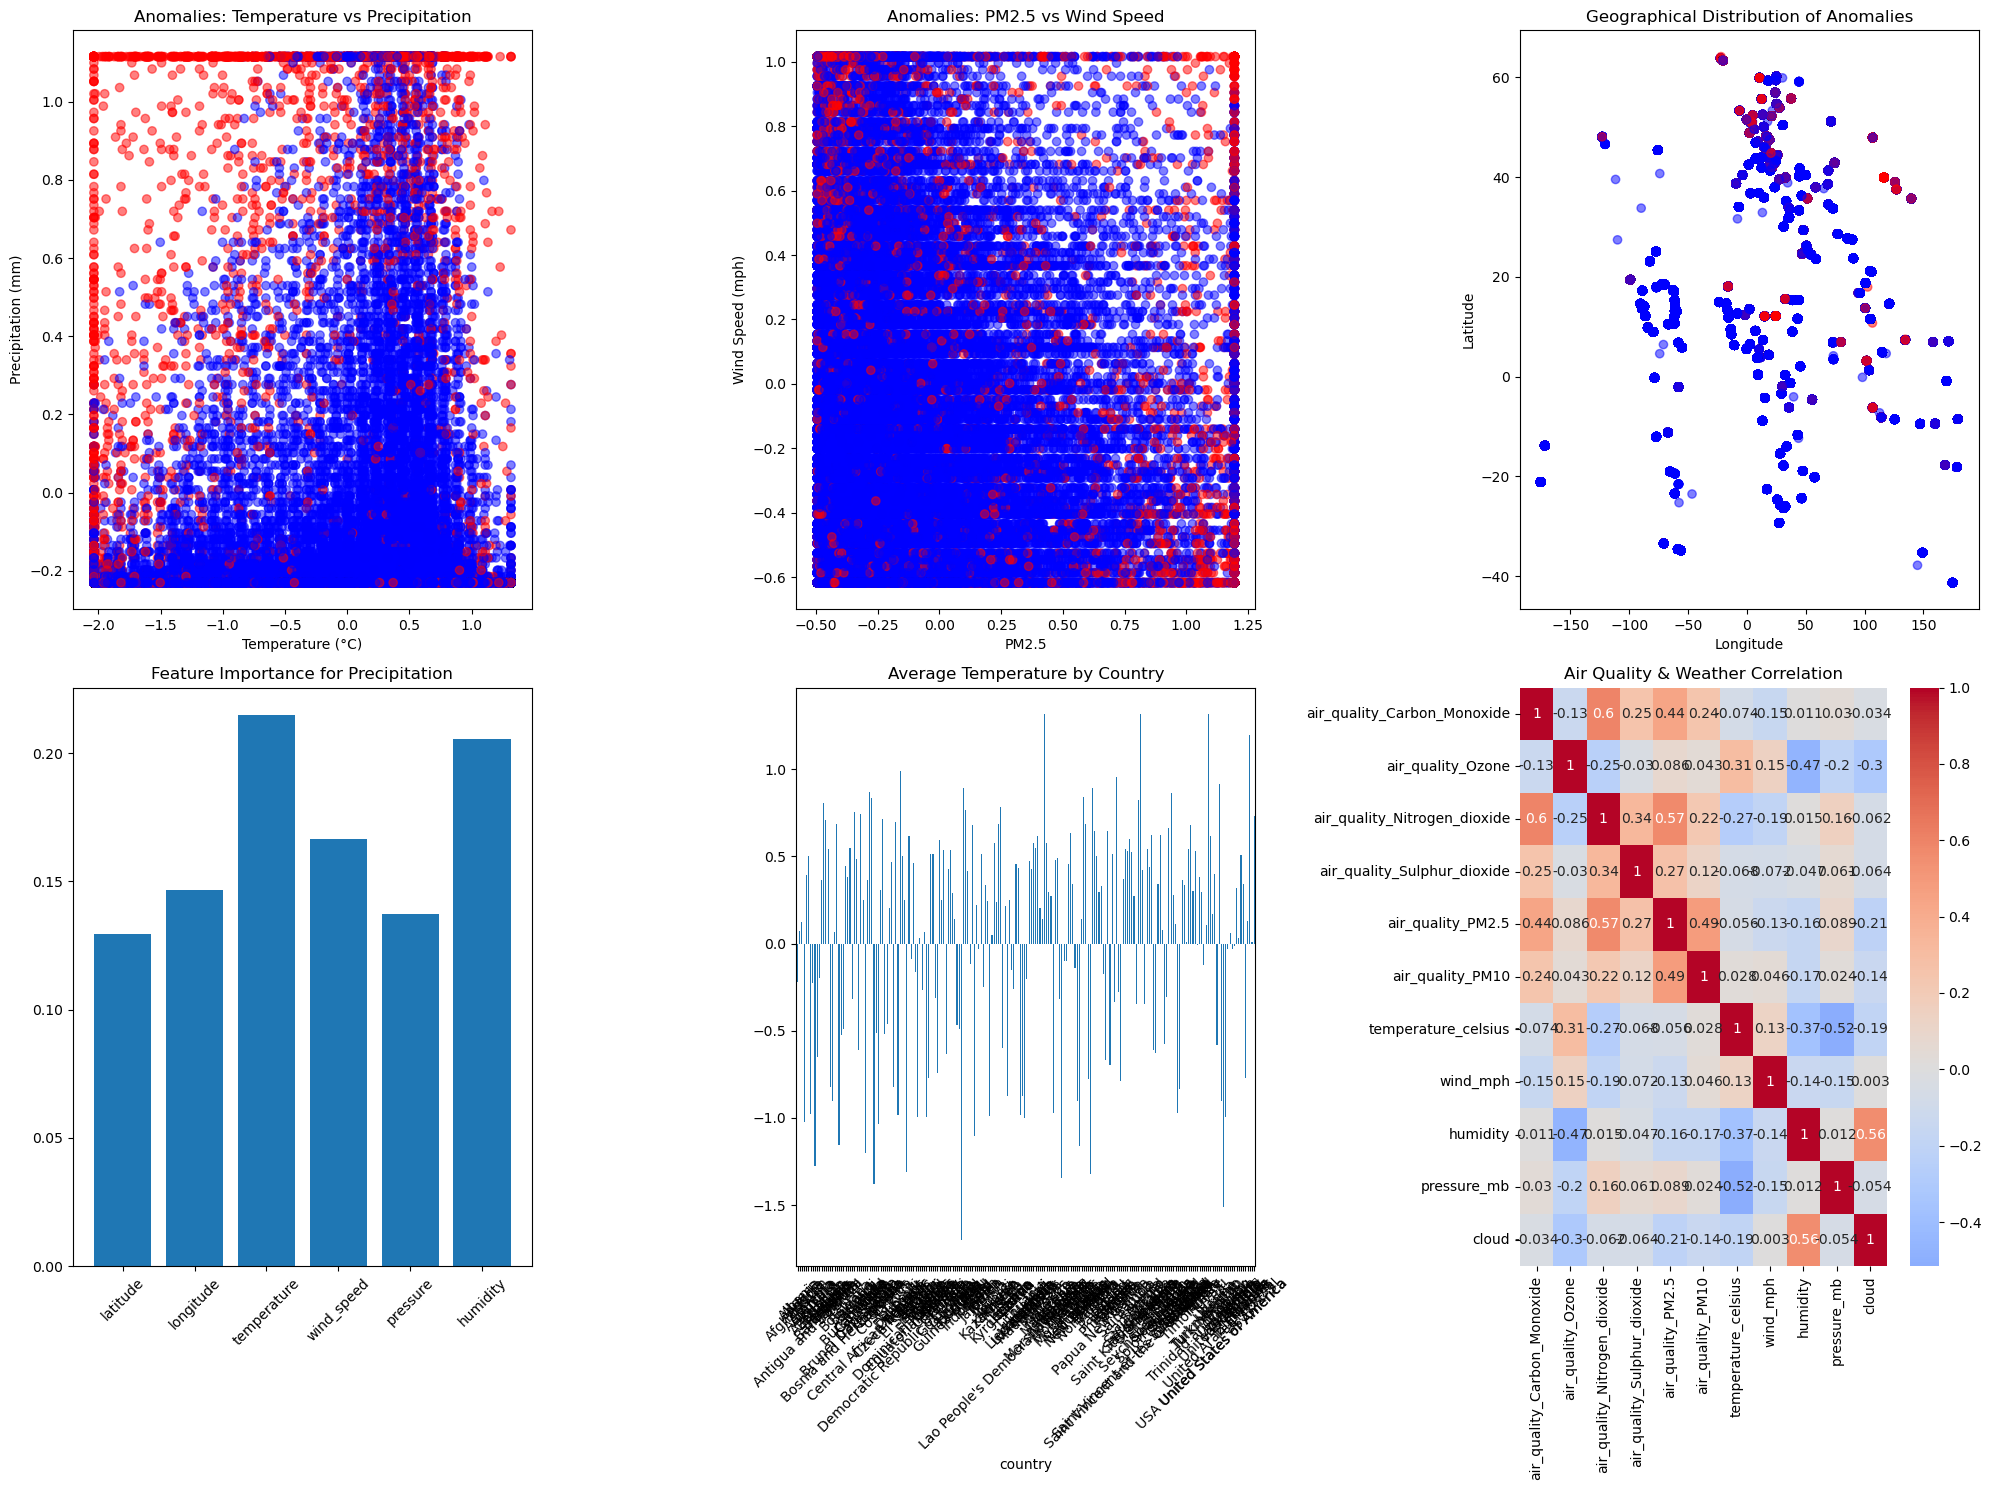

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_anomalies(df, anomalies):
    """
    Visualize anomalies across different weather parameters
    """
    plt.figure(figsize=(20, 15))
    
    # Temperature Anomalies
    plt.subplot(2, 3, 1)
    plt.scatter(df['temperature_celsius'], df['precip_mm'], 
                c=['red' if x == -1 else 'blue' for x in df['anomaly']], 
                alpha=0.5)
    plt.title('Anomalies: Temperature vs Precipitation')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Precipitation (mm)')
    
    # Air Quality Anomalies
    plt.subplot(2, 3, 2)
    plt.scatter(df['air_quality_PM2.5'], df['wind_mph'], 
                c=['red' if x == -1 else 'blue' for x in df['anomaly']], 
                alpha=0.5)
    plt.title('Anomalies: PM2.5 vs Wind Speed')
    plt.xlabel('PM2.5')
    plt.ylabel('Wind Speed (mph)')
    
    # Geographical Distribution of Anomalies
    plt.subplot(2, 3, 3)
    plt.scatter(df['longitude'], df['latitude'], 
                c=['red' if x == -1 else 'blue' for x in df['anomaly']], 
                alpha=0.5)
    plt.title('Geographical Distribution of Anomalies')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Feature Importance Visualization
    plt.subplot(2, 3, 4)
    feature_importances = forecast_results['Random Forest']['feature_importance']
    features = ['latitude', 'longitude', 'temperature', 
                'wind_speed', 'pressure', 'humidity']
    plt.bar(features, feature_importances)
    plt.title('Feature Importance for Precipitation')
    plt.xticks(rotation=45)
    
    # Country-level Climate Variation
    plt.subplot(2, 3, 5)
    country_analysis['temperature_celsius']['mean'].plot(kind='bar')
    plt.title('Average Temperature by Country')
    plt.xticks(rotation=45)
    
    # Air Quality Correlation Heatmap
    plt.subplot(2, 3, 6)
    sns.heatmap(env_impact_correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Air Quality & Weather Correlation')
    
    plt.tight_layout()
    plt.show()

# Call visualization function
visualize_anomalies(processed_df, anomalies)